100%|██████████| 345M/345M [00:16<00:00, 21.5MB/s]
100%|██████████| 502/502 [00:00<00:00, 761kB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 17.7MB/s]


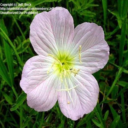

In [1]:
import torchvision
import torch
from PIL import Image
from torchvision import transforms

# Create a vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True)
test_dataset = torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True)

# function to visualize an image
def visualize_image(img: torch.Tensor) -> Image.Image:
  return Image.fromarray((img.permute(1,2,0) * 255).to(torch.uint8).numpy())


visualize_image(train_dataset[1][0])

In [2]:
# with plus
train_dataset[0]

(tensor([[[0.0471, 0.0706, 0.0745,  ..., 0.1255, 0.4667, 0.5647],
          [0.0667, 0.0667, 0.0549,  ..., 0.1333, 0.4824, 0.5647],
          [0.0824, 0.0745, 0.0549,  ..., 0.1451, 0.5059, 0.5686],
          ...,
          [0.1059, 0.1059, 0.0863,  ..., 0.5020, 0.4902, 0.4706],
          [0.1137, 0.1137, 0.1294,  ..., 0.5059, 0.4784, 0.4706],
          [0.1020, 0.1176, 0.1176,  ..., 0.5020, 0.4745, 0.4667]],
 
         [[0.0863, 0.1255, 0.1373,  ..., 0.1294, 0.3412, 0.3961],
          [0.0941, 0.1098, 0.1059,  ..., 0.1294, 0.3490, 0.3922],
          [0.0941, 0.0941, 0.0824,  ..., 0.1294, 0.3608, 0.3843],
          ...,
          [0.2000, 0.1804, 0.1333,  ..., 0.4235, 0.4118, 0.3922],
          [0.2118, 0.2039, 0.2000,  ..., 0.4275, 0.4039, 0.3922],
          [0.2078, 0.2196, 0.2196,  ..., 0.4196, 0.4078, 0.3765]],
 
         [[0.0314, 0.0392, 0.0353,  ..., 0.0863, 0.4745, 0.5961],
          [0.0392, 0.0353, 0.0235,  ..., 0.0980, 0.4902, 0.5922],
          [0.0431, 0.0353, 0.0235,  ...,

TypeError: Invalid shape (3, 128, 128) for image data

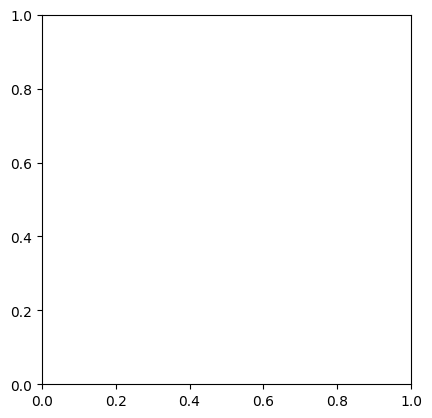

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[1][0])

'''TypeError: Invalid shape (3, 128, 128) for image data'''
''' This is why you permute the dimensions to (1,2,0) to then accept the h,w,3 that imshow() requires'''


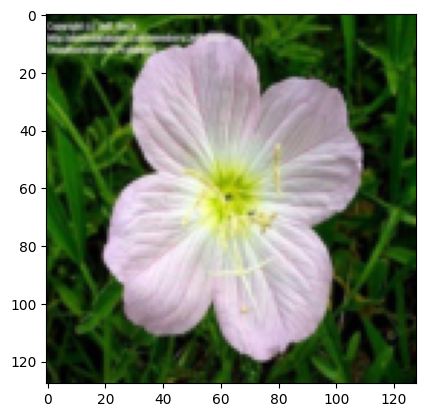

In [4]:
# SHowing a single image
import matplotlib.pyplot as plt
plt.imshow(visualize_image(train_dataset[1][0]))

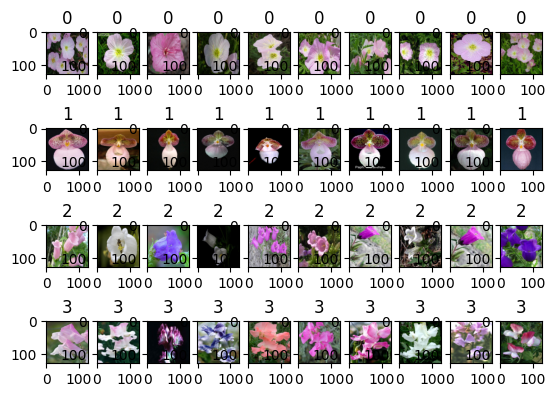

In [5]:
# Showing multiple images
import  matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10)
for i, (im, l) in enumerate(list(train_dataset)[:40]):
  ax[i // 10, i % 10].imshow(visualize_image(im))
  ax[i // 10, i % 10].set_title(l)